In [2]:
# Environment Setup and Data Loading
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # data visualization
import seaborn as sns  # statistical data visualization

import sys
import site
import os

# Check the kernel with these if having issues with the environment
#print("Python executable:", sys.executable)
#print("Python version:", sys.version)
#print("Site packages:", site.getsitepackages())


# Jupyter Notebook depedendency
# %matplotlib inline

data = './diabetes_data.csv'

# Check existence of file
if os.path.exists(data):
    print("Data has been loaded.")
else:
    print("An error while loading the file occurred. Check the file path.")

# Data load
try:
    # Assume the first line are the headers and save them in a list
    df = pd.read_csv(data, header=0)
    col_names = df.columns.tolist()
    print("Headers:", col_names)
    print(df.head())
except Exception as e:
    print(f"An error while loading the file occurred: {e}")


Data has been loaded.
Headers: ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']
   Age  Sex  HighChol  CholCheck  BMI  Smoker  HeartDiseaseorAttack  \
0    4    1         0          1   26       0                     0   
1   12    1         1          1   26       1                     0   
2   13    1         0          1   26       0                     0   
3   11    1         1          1   28       1                     0   
4    8    0         0          1   29       1                     0   

   PhysActivity  Fruits  Veggies  HvyAlcoholConsump  GenHlth  MentHlth  \
0             1       0        1                  0        3         5   
1             0       1        0                  0        3         0   
2             1       1        1                  0        1         0   
3             1       1     

In [3]:
df.shape

(70692, 18)

In [4]:
#get column names and also informations about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Age                   70692 non-null  int64
 1   Sex                   70692 non-null  int64
 2   HighChol              70692 non-null  int64
 3   CholCheck             70692 non-null  int64
 4   BMI                   70692 non-null  int64
 5   Smoker                70692 non-null  int64
 6   HeartDiseaseorAttack  70692 non-null  int64
 7   PhysActivity          70692 non-null  int64
 8   Fruits                70692 non-null  int64
 9   Veggies               70692 non-null  int64
 10  HvyAlcoholConsump     70692 non-null  int64
 11  GenHlth               70692 non-null  int64
 12  MentHlth              70692 non-null  int64
 13  PhysHlth              70692 non-null  int64
 14  DiffWalk              70692 non-null  int64
 15  Stroke                70692 non-null  int64
 16  High

In [6]:
#check unique values

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose().sort_values(by='unique value count', ascending=False)

,unique value count
BMI,80
PhysHlth,31
MentHlth,31
Age,13
GenHlth,5
HvyAlcoholConsump,2
HighBP,2
Stroke,2
DiffWalk,2
Veggies,2


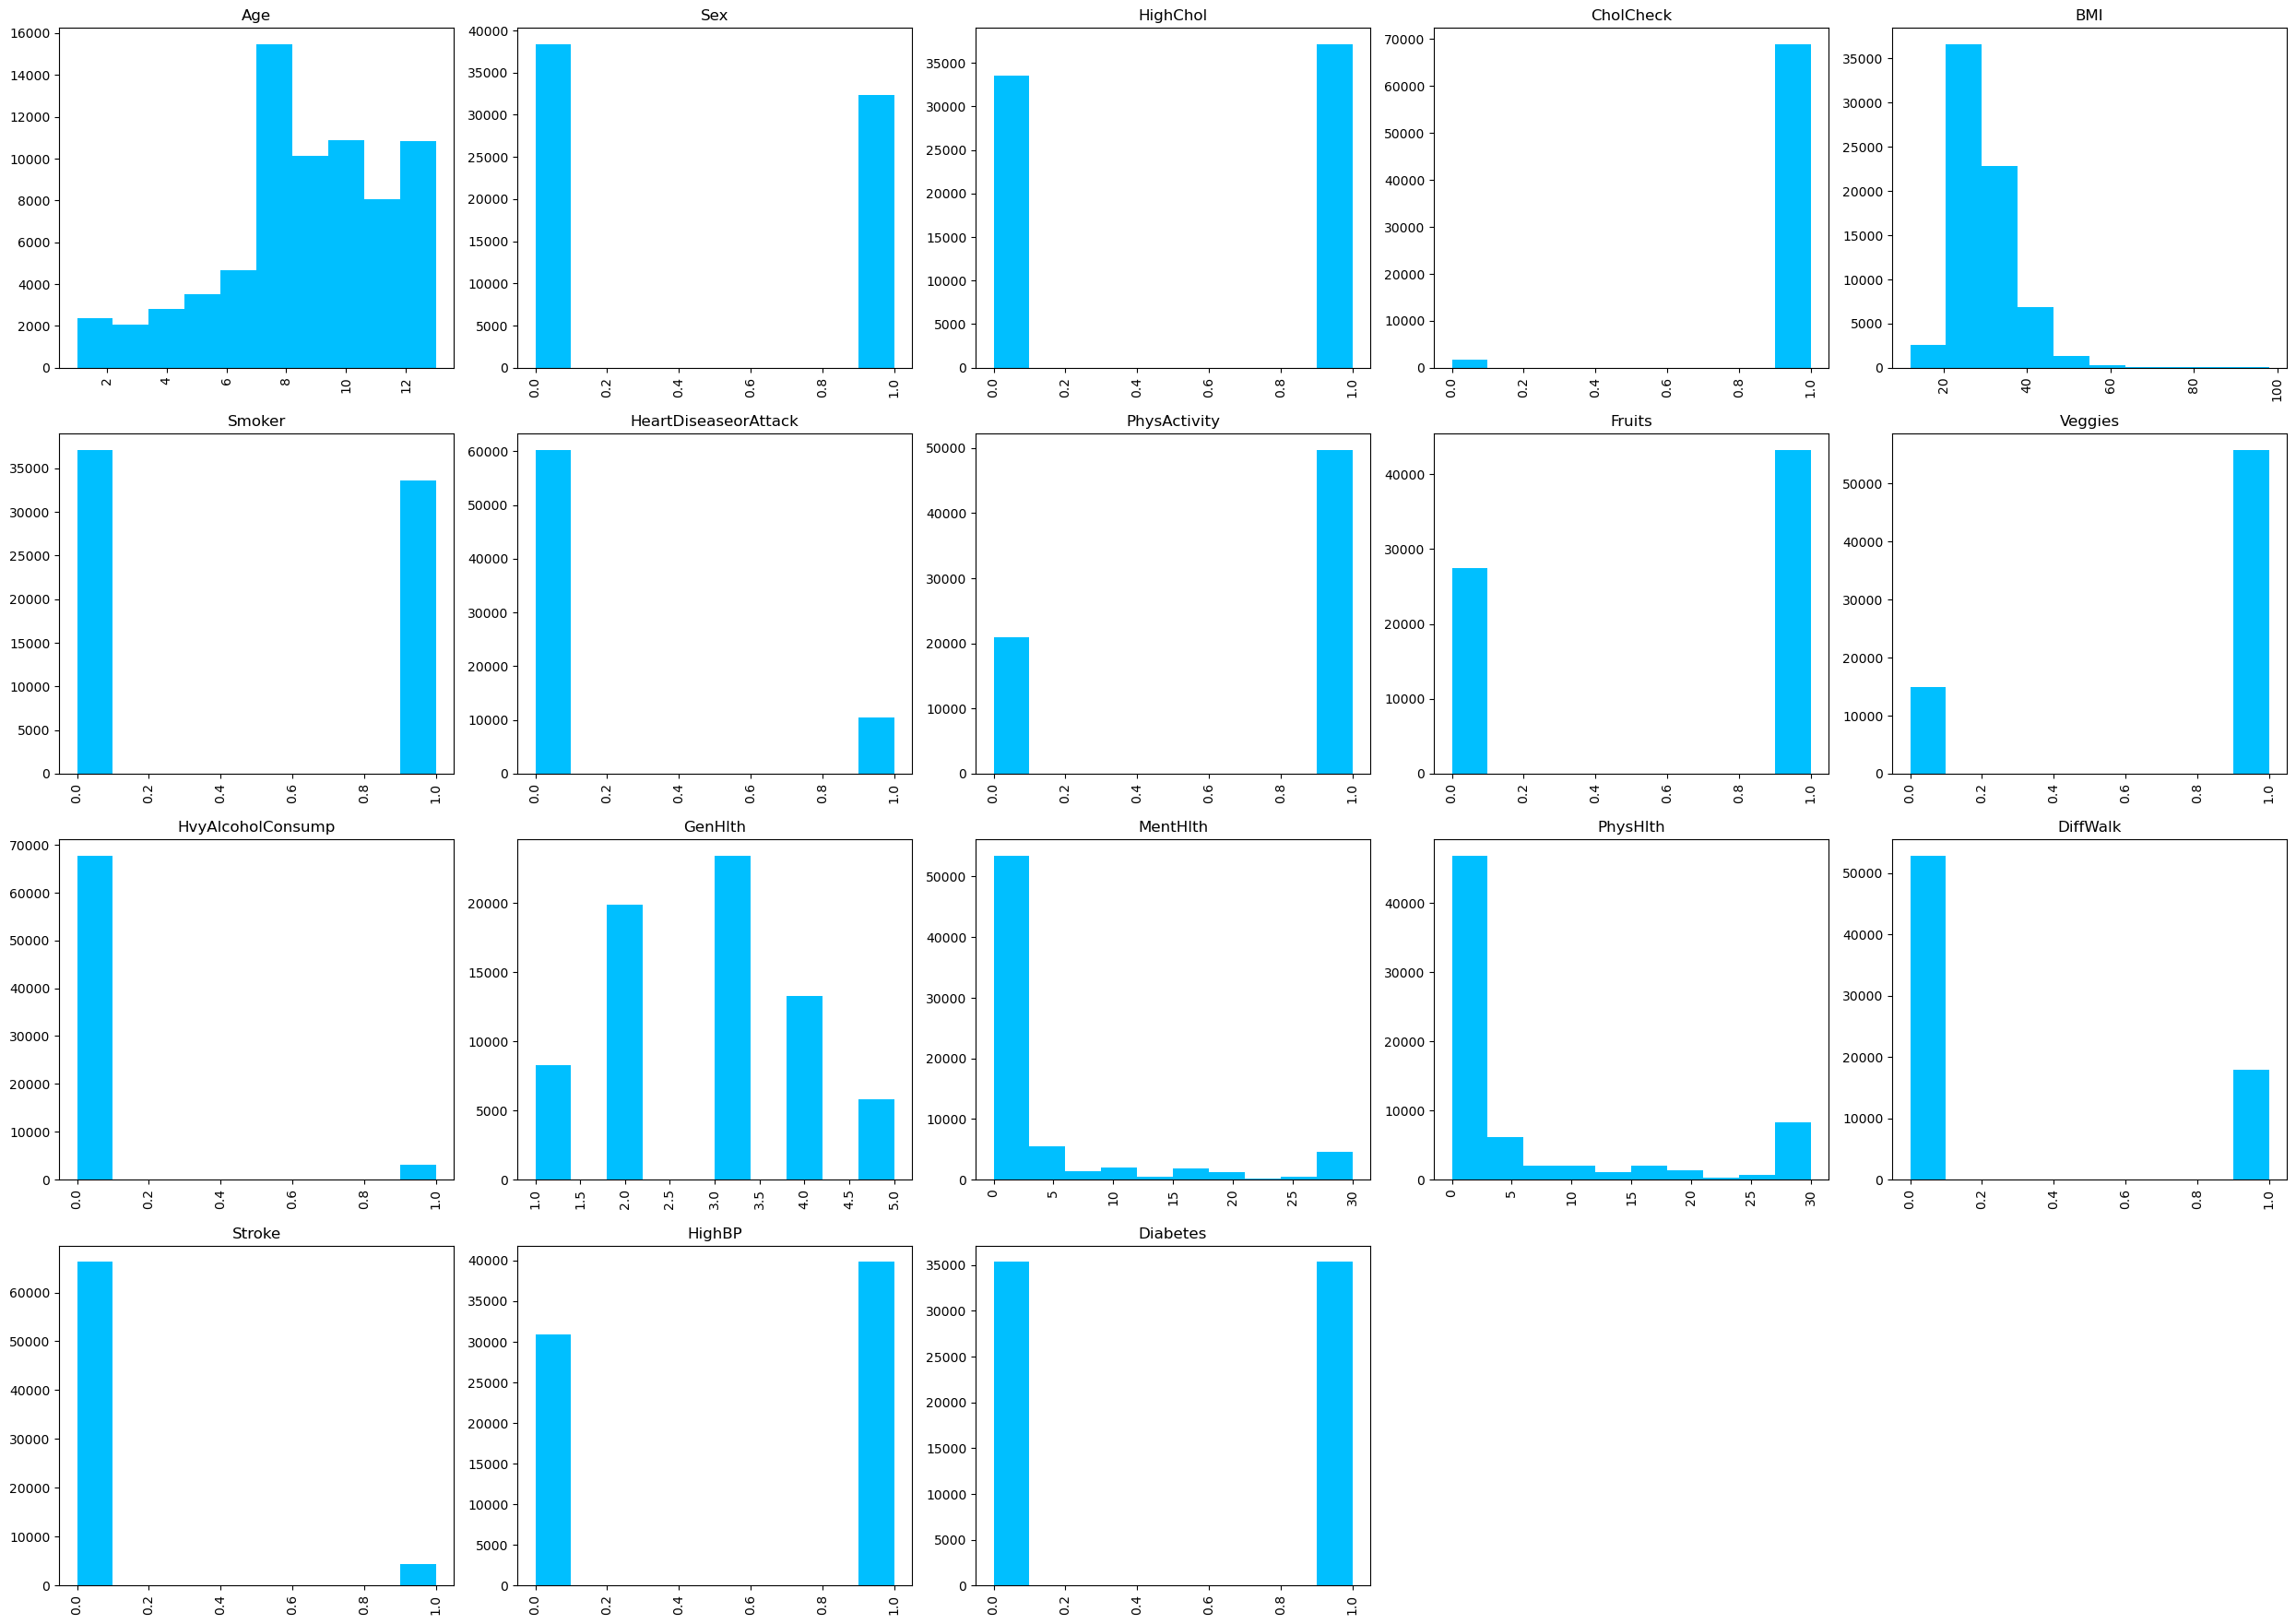

In [7]:
#check frequency of all values in the column

feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

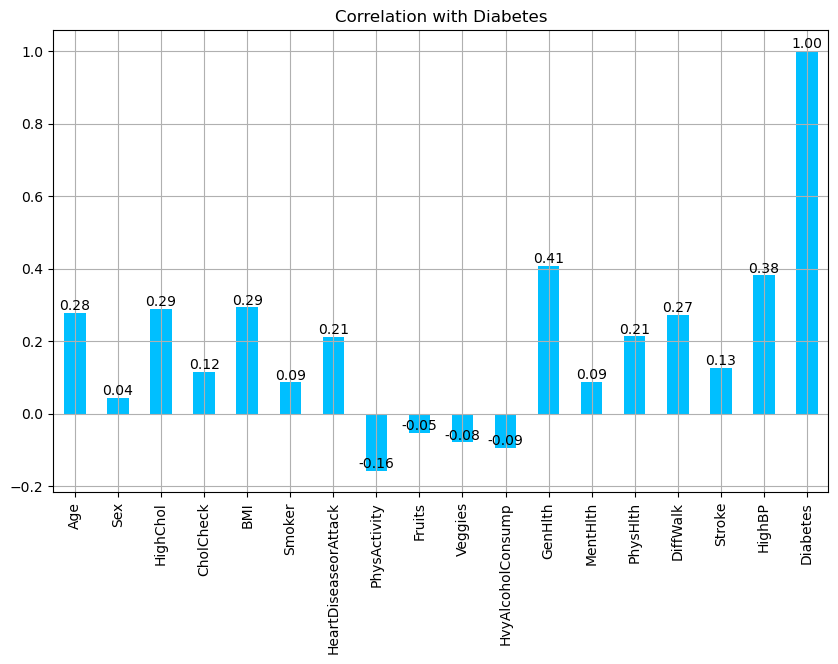

In [10]:
# check correlation of other columns with diabetes column with Pearson Correlation
numerical_cols = df.select_dtypes(include=['number']).columns
ax = df[numerical_cols].corrwith(df['Diabetes']).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes", color="deepskyblue");
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


In [ ]:
### Variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies, HvyAlcoholConsump, MentHlth.

<Axes: title={'center': 'Feature Correlation Heatmap'}>

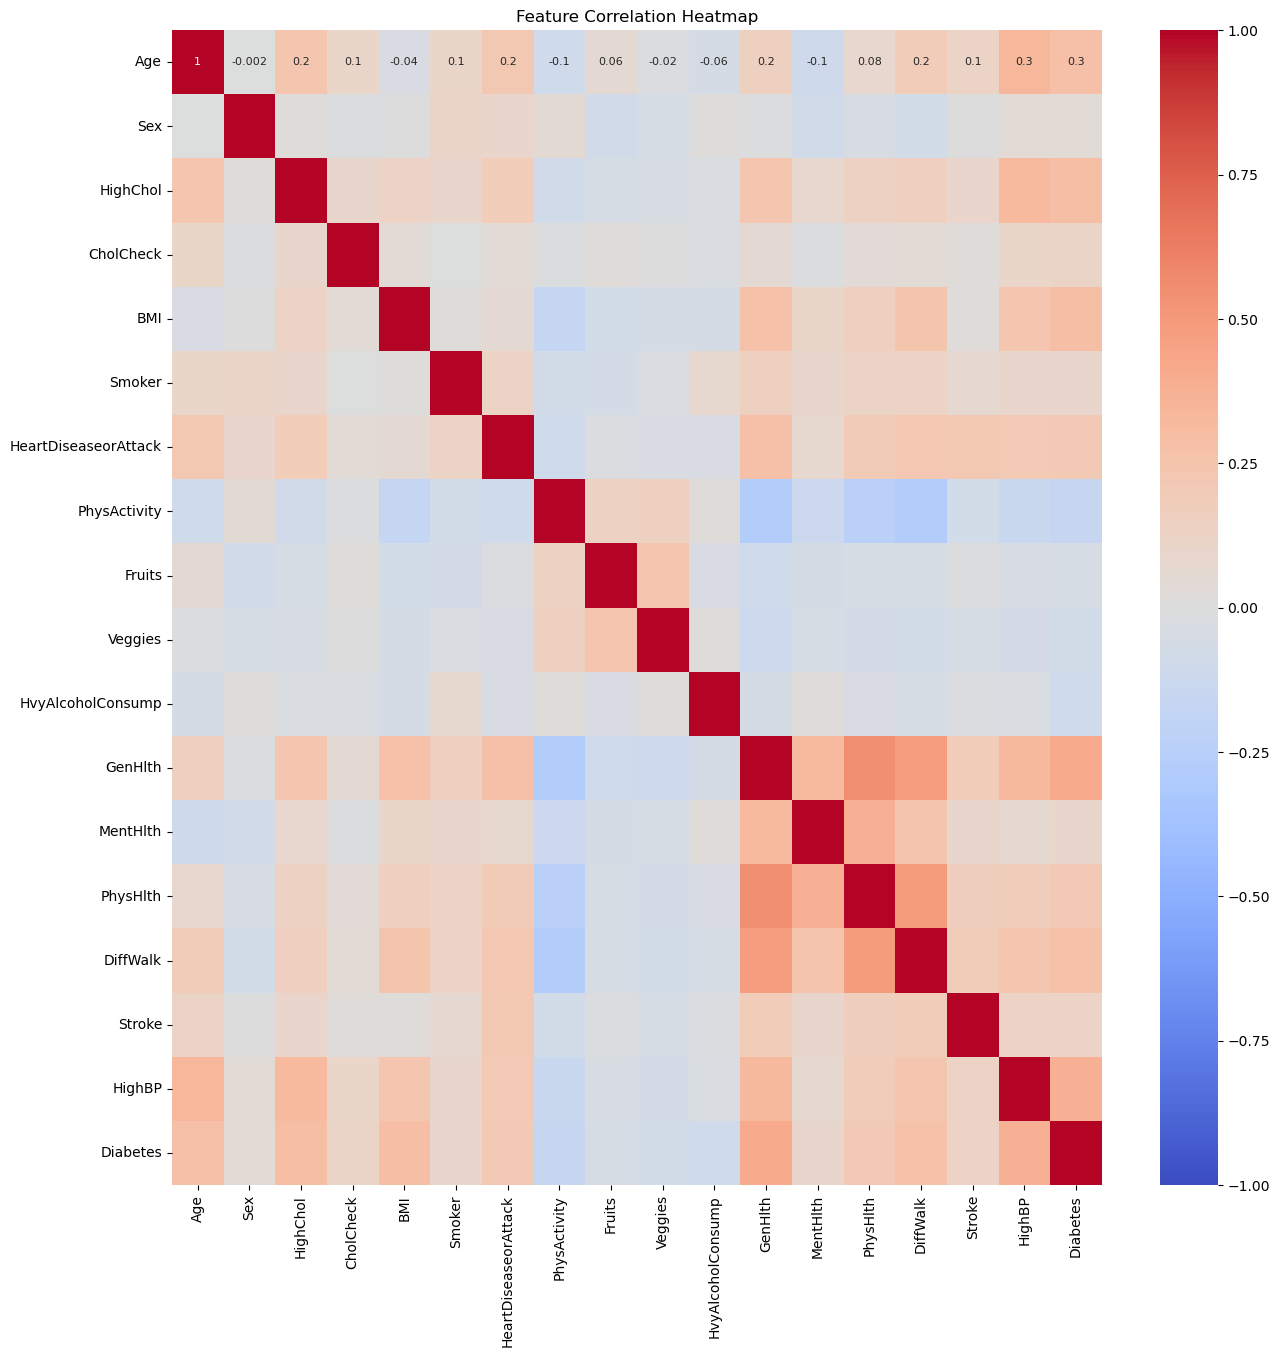

In [31]:
# Correlation between any two features
# check for possible co-variates

#sns.set(rc = {'figure.figsize':(10,10)})
#sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

### The seaborn .set is deprecated duo to changes in seaborn api. We can use the following instead 

plt.figure(figsize=(15,15))
plt.title('Feature Correlation Heatmap')
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, annot_kws={'size': 8}, fmt='.1g', cmap='coolwarm')



In [32]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


In [18]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [33]:
#Data splitting
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']  # everything except "diabetes"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% train 

In [34]:
df

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1,0
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6,0,1,1,37,0,0,0,0,1,0,4,0,0,0,0,0,1
70688,10,1,1,1,29,1,1,0,1,1,0,2,0,0,1,0,0,1
70689,13,0,1,1,25,0,1,0,1,0,0,5,15,0,1,0,1,1
70690,11,0,1,1,18,0,0,0,0,0,0,4,0,0,1,0,1,1


In [35]:
X_test.shape

(21208, 17)

In [36]:
X_train.dtypes

Age                     int64
Sex                     int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Stroke                  int64
HighBP                  int64
dtype: object

In [37]:
X_train.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
14533,13,0,1,1,18,0,0,1,1,1,0,3,0,3,0,0,1
57060,10,0,1,1,34,1,1,0,1,0,0,4,0,0,1,0,1
26147,10,0,1,1,34,1,0,0,0,1,0,3,11,5,1,0,1
24376,4,0,0,0,32,1,0,1,0,1,0,2,0,0,0,0,0
49271,7,0,0,1,37,1,0,0,1,0,0,2,20,5,0,0,1


In [38]:
X_test.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP
44967,10,0,1,1,23,1,0,1,0,1,0,4,0,0,0,0,0
20220,13,0,0,1,33,1,0,0,1,1,0,3,0,3,1,0,0
23944,8,1,1,1,27,1,0,1,1,1,0,2,0,5,0,0,1
2707,7,1,1,1,29,1,0,0,1,0,0,3,0,5,0,0,0
42356,6,1,0,1,47,0,0,1,1,1,0,4,30,10,1,0,1


In [40]:
from sklearn.tree import DecisionTreeClassifier
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [32]:
y_pred_gini = clf_gini.predict(X_test)

In [33]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))## ce am prezis y_pred_gini si ce este de fapt y_test

Model accuracy score with criterion gini index: 0.7191


In [34]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([1, 1, 1, ..., 0, 0, 0])

In [35]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7188
Test set score: 0.7191


[Text(0.5, 0.875, 'x[16] <= 0.5\ngini = 0.5\nsamples = 49484\nvalue = [24745, 24739]'),
 Text(0.25, 0.625, 'x[11] <= 2.5\ngini = 0.406\nsamples = 21594\nvalue = [15486, 6108]'),
 Text(0.125, 0.375, 'x[0] <= 9.5\ngini = 0.248\nsamples = 12136\nvalue = [10378, 1758]'),
 Text(0.0625, 0.125, 'gini = 0.185\nsamples = 9056\nvalue = [8121, 935]'),
 Text(0.1875, 0.125, 'gini = 0.392\nsamples = 3080\nvalue = [2257, 823]'),
 Text(0.375, 0.375, 'x[0] <= 6.5\ngini = 0.497\nsamples = 9458\nvalue = [5108, 4350]'),
 Text(0.3125, 0.125, 'gini = 0.419\nsamples = 3002\nvalue = [2105, 897]'),
 Text(0.4375, 0.125, 'gini = 0.498\nsamples = 6456\nvalue = [3003, 3453]'),
 Text(0.75, 0.625, 'x[11] <= 2.5\ngini = 0.444\nsamples = 27890\nvalue = [9259, 18631]'),
 Text(0.625, 0.375, 'x[4] <= 29.5\ngini = 0.498\nsamples = 7679\nvalue = [4096, 3583]'),
 Text(0.5625, 0.125, 'gini = 0.474\nsamples = 4392\nvalue = [2697, 1695]'),
 Text(0.6875, 0.125, 'gini = 0.489\nsamples = 3287\nvalue = [1399, 1888]'),
 Text(0.875,

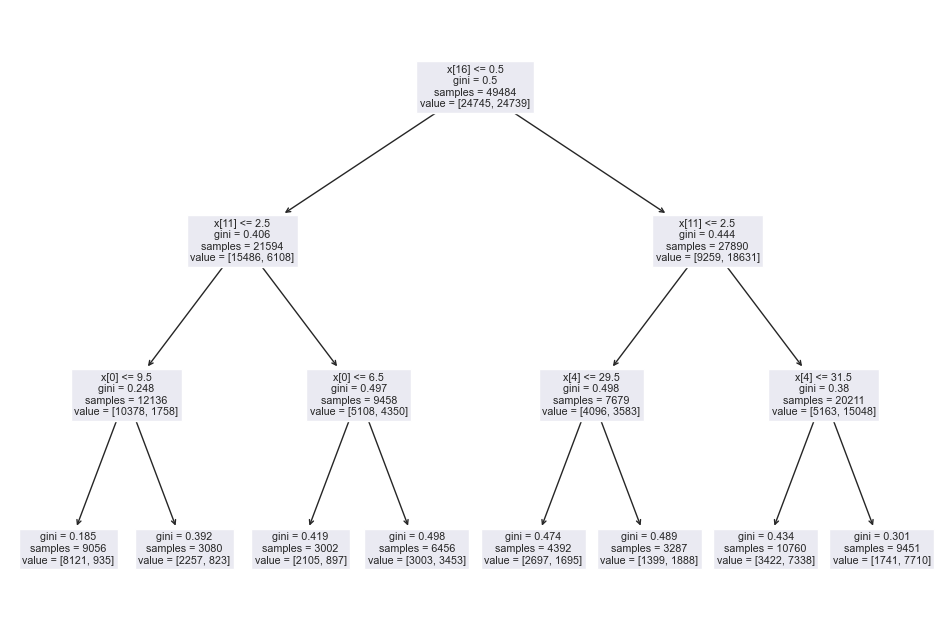

In [36]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [37]:
# instantiate the DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [38]:
y_pred_en = clf_en.predict(X_test)


In [39]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7170


In [40]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 1, 1, ..., 0, 0, 0])

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7155


In [44]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7155
Test set score: 0.7170


[Text(0.5, 0.875, 'x[16] <= 0.5\nentropy = 1.0\nsamples = 49484\nvalue = [24745, 24739]'),
 Text(0.25, 0.625, 'x[11] <= 2.5\nentropy = 0.859\nsamples = 21594\nvalue = [15486, 6108]'),
 Text(0.125, 0.375, 'x[0] <= 8.5\nentropy = 0.597\nsamples = 12136\nvalue = [10378, 1758]'),
 Text(0.0625, 0.125, 'entropy = 0.439\nsamples = 7655\nvalue = [6960, 695]'),
 Text(0.1875, 0.125, 'entropy = 0.79\nsamples = 4481\nvalue = [3418, 1063]'),
 Text(0.375, 0.375, 'x[0] <= 5.5\nentropy = 0.995\nsamples = 9458\nvalue = [5108, 4350]'),
 Text(0.3125, 0.125, 'entropy = 0.827\nsamples = 2178\nvalue = [1612, 566]'),
 Text(0.4375, 0.125, 'entropy = 0.999\nsamples = 7280\nvalue = [3496, 3784]'),
 Text(0.75, 0.625, 'x[11] <= 2.5\nentropy = 0.917\nsamples = 27890\nvalue = [9259, 18631]'),
 Text(0.625, 0.375, 'x[4] <= 29.5\nentropy = 0.997\nsamples = 7679\nvalue = [4096, 3583]'),
 Text(0.5625, 0.125, 'entropy = 0.962\nsamples = 4392\nvalue = [2697, 1695]'),
 Text(0.6875, 0.125, 'entropy = 0.984\nsamples = 3287\n

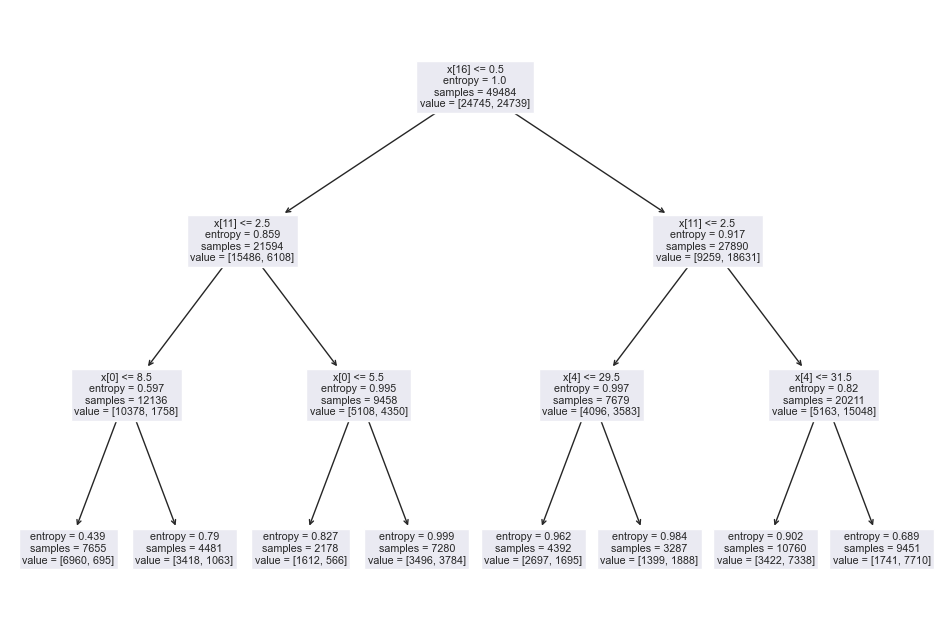

In [46]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

In [49]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)
# 6524 = avea diabet si algoritmul a prezis corect
# 8953 = nu avea diabet si agoritmul a prezis corect
#4347 = nu avea diabet, dar algoritmul a prezis ca avea
# 1654 = avea diabet, dar algoritmul nu l a prezis corect

Confusion matrix

 [[6254 4347]
 [1654 8953]]
